## Used car dataset from eBay Kleinanzeigen

The purpose of this project is importing, cleaning and exploratory analysis of used car listings from the German ebay website. Results are visualized to help easily understand and compare the data. Observations from the analysis are summarized at the end.

In [280]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib

# Read the input CSV data file into a dataframe
input_file = 'autos.csv'
autos = pd.read_csv(input_file, encoding='Latin-1' )


In [281]:
# Setup the NB to display plots inline
%matplotlib inline

Some options to look at the dataframe and get familiar with the dataset
- Using a helper function that reads in the CSV file and prints out specific number of rows in a table format
- Running the variable 'autos' from above. This utilizes the benefits of jupyter notebook for pandas and will render the first few and last few values in a table format. 
- Using df.head() or .tail() to print the first and last few rows in a table format

In [282]:
def print_some_rows(csv_file, num_rows, enc='Latin-1'):
    return pd.read_csv(csv_file, nrows=num_rows, encoding=enc)

In [283]:
print_some_rows(input_file, 8)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32


In [284]:
#autos

In [285]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [286]:
# Details about the dataframe - number of rows and columns, names of columns and types of data they contain
autos.info()
autos.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

dateCrawled            object
name                   object
seller                 object
offerType              object
price                  object
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
odometer               object
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

## Observations on the input dataset
There are 50,000 rows with 20 columns of datapoints which are mostly strings. 

There are 5 numeric columns.

Some columns have missing values.

More observations on patterns and the need to clean: 

- Some column labels are not as readable or too long. The following edits will make them better

Replace
 1. `yearOfRegistration` with `registration_year`
 2.  `monthOfRegistration` with `registration_month`
 3. `notRepairedDamage` with `unrepaired_damage`
 4. `dateCreated` with `ad_created`
 
- Some column labels are in camelCase. It will be more user friendly to comply with Python's `lower_case_with_underscores` snake format

Define functions to make the two changes to them.

In [287]:
# Get column names using .columns attribute
print (autos.columns)
print (list(autos.columns))
# While this is useful for looping over in cleaning the column names, df.head() is also useful for a quick view of the names in a table format 
autos.head(0)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')
['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'odometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


## Make column labels readable

In [288]:
# Function that edits existing column names to be readable
def edit_cols(col):
    col = col.replace('yearOfRegistration', 'registration_year')
    col = col.replace('monthOfRegistration', 'registration_month')
    col = col.replace('notRepairedDamage', 'unrepaired_damage')
    col = col.replace('dateCreated', 'ad_created')
    return col 

In [289]:
# Implement the above function on the columns
ed_cols = []

for col in list(autos.columns):
    ed_cols.append(edit_cols(col))
# Assign modified column names list back to the .columns attribute
autos.columns = ed_cols

print (autos.columns)
autos.head(0)


Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuelType', 'brand',
       'unrepaired_damage', 'ad_created', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,registration_year,gearbox,powerPS,model,odometer,registration_month,fuelType,brand,unrepaired_damage,ad_created,nrOfPictures,postalCode,lastSeen


In [290]:
# Function that converts column names to python snake case
def to_snake(col):
    snake = col[0].lower()
    return (snake + ''.join( '_'+l.lower() if l.isupper() else l for l in col[1:]) )

In [291]:
# Implement the above function on the columns
snaked_cols = []
for c in autos.columns:
    snaked_cols.append(to_snake(c))
# Assign modified column names list back to the .columns attribute
autos.columns = snaked_cols

In [292]:
# Column names after the modifications
autos.head(0)

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen


## Data exploration and cleaning

In [293]:
# Summary stats of all columns - numeric and non-numeric
autos.describe(include='all')


,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-05 16:57:05,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [294]:
# Summary stats of just numeric columns to better explore how good data quality is
autos.describe()

,registration_year,power_p_s,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [295]:
# Summary stats of non-numeric columns
autos.describe(include=['O'])

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,gearbox,model,odometer,fuel_type,brand,unrepaired_damage,ad_created,last_seen
count,50000,50000,50000,50000,50000,50000,44905,47320,47242,50000,45518,50000,40171,50000,50000
unique,48213,38754,2,2,2357,2,8,2,245,13,7,40,2,76,39481
top,2016-03-05 16:57:05,Ford_Fiesta,privat,Angebot,$0,test,limousine,manuell,golf,"150,000km",benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,36993,4024,32424,30107,10687,35232,1946,8


## Observations on  numeric columns:
- Earliest and latest `registration_year` values 1000 and 9999 need further digging into
- `registration_month` is 0 for over 5K data points. It needs to be looked into.
- `power_in_ps` for some listings is 0. That means car is a dud or for scrap only
- `nr_of_pictures` has 0 for all 50K values, which is not useful for analysis and can be dropped

## Observations on non-numeric columns:
-  Some of the columns have very few unique values and need translation from German to figure usefulness for analysis
- `price` has non-digit characters ($ and punctuation - commas). Removing those characters can help converting it to numeric data type
- `price` has values of 0 which is strange and needs further study
- `odometer` has non-digit characters (km and punctuation - commas), which can be removed and column data type converted to numeric as well  

Get a closer look at the counts on numeric columns


In [296]:
autos['registration_month'].value_counts()

0     5075
3     5071
6     4368
5     4107
4     4102
7     3949
10    3651
12    3447
9     3389
11    3360
1     3282
8     3191
2     3008
Name: registration_month, dtype: int64

In [297]:
autos['power_p_s'].value_counts().head(10)

0      5500
75     3171
60     2195
150    2046
140    1884
101    1756
90     1746
116    1646
170    1492
105    1410
Name: power_p_s, dtype: int64

In [298]:
autos['nr_of_pictures'].value_counts()

0    50000
Name: nr_of_pictures, dtype: int64

In [299]:
# Convert string columns to numeric data type 
autos['price'] = autos['price'].str.replace('$','')
autos['price'] = autos['price'].str.replace(',','')
autos['odometer'] =autos['odometer'].str.replace('km','')
autos['odometer'] =autos['odometer'].str.replace(',','')

autos[ ['price', 'odometer']  ] = autos[ ['price', 'odometer']  ].astype(int)

In [300]:
# Rename odometer column to odometer_km, since, km is a useful unit, for information 
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)

In [301]:
# dataframe.dtypes will help verify the changed data types and column names
autos.dtypes

date_crawled          object
name                  object
seller                object
offer_type            object
price                  int64
abtest                object
vehicle_type          object
registration_year      int64
gearbox               object
power_p_s              int64
model                 object
odometer_km            int64
registration_month     int64
fuel_type             object
brand                 object
unrepaired_damage     object
ad_created            object
nr_of_pictures         int64
postal_code            int64
last_seen             object
dtype: object

In [302]:
autos.isnull().sum()

date_crawled             0
name                     0
seller                   0
offer_type               0
price                    0
abtest                   0
vehicle_type          5095
registration_year        0
gearbox               2680
power_p_s                0
model                 2758
odometer_km              0
registration_month       0
fuel_type             4482
brand                    0
unrepaired_damage     9829
ad_created               0
nr_of_pictures           0
postal_code              0
last_seen                0
dtype: int64

As observed earlier, some columns have null values, however, not more than about 20%

## Analysis of numeric columns `price` and `odometer_km`

In [303]:
print (autos['price'].unique().shape)
print (autos['odometer_km'].unique().shape)

(2357,)
(13,)


In [304]:
autos['odometer_km'].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000])

In [352]:
autos.odometer_km.value_counts()

150000    25936
125000     4441
100000     1848
90000      1522
80000      1279
70000      1087
60000      1043
50000       932
40000       754
30000       707
20000       673
5000        469
10000       202
Name: odometer_km, dtype: int64

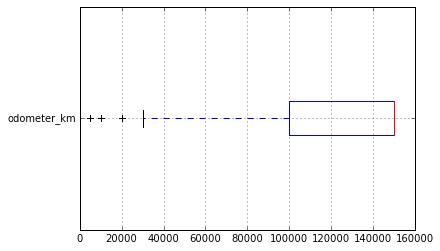

In [358]:
autos.odometer_km.plot.box(vert=False,grid=True)

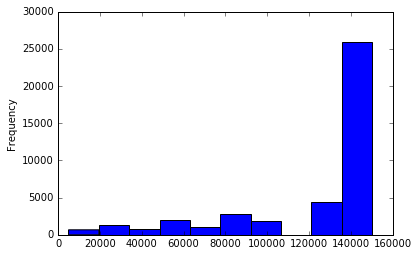

In [359]:
autos.odometer_km.plot.hist()

In [305]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

Listings range from low-mileage cars (5000 km) to high-mileage ones (150000 km)

Most cars' mileage is on the higher side - over 120000KM. Visualizing it above indicates that the maximum, median value and 3rd quartile are all coinciding at 150K. It also shows that there is a wide range in the values of mileage (i.e more spread out data) in the under 100K area and about 50% of the listings are close together in the higher range.  
When we split the `odometer_km` into bins later on in the analysis, it will be clearer which bins most mileages fall into.


In [306]:
autos['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

As found earlier, `price` column has some outliers - minimum of 0 and maximum of ~100M dollars. Let's study the price list further

In [307]:
 pd.DataFrame(autos['price'].value_counts(dropna=False).head(10))

,price
0,1421
500,781
1500,734
2500,643
1000,639
1200,639
600,531
800,498
3500,498
2000,460


The value_counts index above (which is actually the price) is in ascending order, so, by reversing the order of the index, let's see what the price distribution looks like on the higher end.

In [308]:
pd.DataFrame(autos['price'].value_counts().sort_index(ascending=False).head(20))

,price
99999999,1
27322222,1
12345678,3
11111111,2
10000000,1
3890000,1
1300000,1
1234566,1
999999,2
999990,1


- There are no cars in range  350000 < `price` < 999990

- A used car has nearly 100M price tag - find what that is (i.e row with the MAX value of `price` )

In [309]:

pd.DataFrame(autos.loc[autos['price'].idxmax()])

,39705
date_crawled,2016-03-22 14:58:27
name,Tausch_gegen_gleichwertiges
seller,privat
offer_type,Angebot
price,99999999
abtest,control
vehicle_type,limousine
registration_year,1999
gearbox,automatik
power_p_s,224


It's an intriguing listing name (when translated to english) - *Exchange for something of the same value*.

It's also unrealistic a limo with 150K miles would be worth a 100M dollars.  

Let's see how many and of what type used cars are in millions of dollars

In [310]:
millions = autos['price'] > 999999
car_is = autos[millions]
pd.DataFrame(car_is[ ['vehicle_type', 'model','odometer_km', 'brand', 'price' ] ])

,vehicle_type,model,odometer_km,brand,price
2897,limousine,escort,50000,ford,11111111
7814,coupe,NaN,50000,sonstige_autos,1300000
11137,coupe,NaN,100000,sonstige_autos,10000000
22947,kombi,NaN,150000,bmw,1234566
24384,NaN,NaN,150000,volkswagen,11111111
27371,NaN,punto,150000,fiat,12345678
39377,NaN,v40,150000,volvo,12345678
39705,limousine,s_klasse,150000,mercedes_benz,99999999
42221,limousine,c4,40000,citroen,27322222
47598,limousine,vectra,150000,opel,12345678


Even millions price range does not seem to contain any of the expensive brands like Bugatti or Lamborghini, which could sell for that much in used condition. 

There are many that are missing vehicle type or model. A buyer would need that information before bidding.

Therefore, it's reasonable to drop these and explore data points upto 1M. 

In [311]:
# Look at the distribution when the price is between 500 and 1M.
upto_1mil = autos['price'].between(500,999999)
autos_1mil = autos[upto_1mil]
autos_1mil['price'].describe()

count     45100.000000
mean       6386.757738
std       12306.631453
min         500.000000
25%        1500.000000
50%        3500.000000
75%        7900.000000
max      999999.000000
Name: price, dtype: float64

Checking distribution again using an upper price limit of 350K, not many data points are lost compared to 1M, because there are no listings between 350K and 1M. 

Also, $6K is more realistic for average price of a used car. 

In [312]:
# Clean the data so that prices are between 500 and 350K. Look at the distribution 
upto_350k = autos['price'].between(500,350000)
autos_350k = autos[upto_350k]
print (autos_350k['price'].describe())
autos = autos_350k

count     45097.000000
mean       6320.659600
std        9261.841444
min         500.000000
25%        1500.000000
50%        3500.000000
75%        7900.000000
max      350000.000000
Name: price, dtype: float64


In [313]:
# Lines left after cleaning
autos.shape

(45097, 20)

## Explore columns containing dates

These columns are string values right now
- `date_crawled`
- `ad_created` 
- `last_seen`

They can be better understood and useful for analysis when converted to numeric type

In [314]:
autos[['date_crawled','ad_created','last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


- Select first 10 characters which is sufficient for the date in yyyy-mm-dd format
- Get relative frequencies (or percentages) instead of counts of the unique values, including missing(null) values, sorted in  ascending order of dates

These columns have non-numeric values so, Series.describe() gets us different stats like so:

In [315]:
autos['date_crawled'].str[:10].describe()

count          45097
unique            34
top       2016-04-03
freq            1751
Name: date_crawled, dtype: object

In [316]:
# Look at the distribution of values in percentages
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.025567
2016-03-06    0.014125
2016-03-07    0.036189
2016-03-08    0.033173
2016-03-09    0.032907
2016-03-10    0.032707
2016-03-11    0.033018
2016-03-12    0.037320
2016-03-13    0.015522
2016-03-14    0.036300
2016-03-15    0.034016
2016-03-16    0.029359
2016-03-17    0.031155
2016-03-18    0.012883
2016-03-19    0.034747
2016-03-20    0.038073
2016-03-21    0.037741
2016-03-22    0.033018
2016-03-23    0.032397
2016-03-24    0.028982
2016-03-25    0.031089
2016-03-26    0.032641
2016-03-27    0.031177
2016-03-28    0.034836
2016-03-29    0.033262
2016-03-30    0.033328
2016-03-31    0.031665
2016-04-01    0.033905
2016-04-02    0.035767
2016-04-03    0.038827
2016-04-04    0.036610
2016-04-05    0.013172
2016-04-06    0.003171
2016-04-07    0.001353
Name: date_crawled, dtype: float64

In [317]:
autos['ad_created'].str[:10].describe()

count          45097
unique            76
top       2016-04-03
freq            1761
Name: ad_created, dtype: object

Ads are created starting 2015-06-11. Most listings occured on 2016-04-03

In [318]:
# Look at the distribution of values in percentages
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index().head(20)

2015-06-11    0.000022
2015-08-10    0.000022
2015-09-09    0.000022
2015-11-10    0.000022
2015-12-05    0.000022
2015-12-30    0.000022
2016-01-03    0.000022
2016-01-07    0.000022
2016-01-10    0.000044
2016-01-13    0.000022
2016-01-14    0.000022
2016-01-16    0.000022
2016-01-22    0.000022
2016-01-27    0.000067
2016-01-29    0.000022
2016-02-01    0.000022
2016-02-02    0.000044
2016-02-05    0.000044
2016-02-07    0.000022
2016-02-08    0.000022
Name: ad_created, dtype: float64

`date_crawled` and `last_seen` are the same dates

In [319]:
autos['last_seen'].str[:10].describe()

count          45097
unique            34
top       2016-04-06
freq           10161
Name: last_seen, dtype: object

In [320]:
# Look at the distribution of values in percentages
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001087
2016-03-06    0.004169
2016-03-07    0.005211
2016-03-08    0.007007
2016-03-09    0.009468
2016-03-10    0.010289
2016-03-11    0.012041
2016-03-12    0.023904
2016-03-13    0.008870
2016-03-14    0.012285
2016-03-15    0.015677
2016-03-16    0.016165
2016-03-17    0.027674
2016-03-18    0.007406
2016-03-19    0.015411
2016-03-20    0.020423
2016-03-21    0.020667
2016-03-22    0.021243
2016-03-23    0.018405
2016-03-24    0.019536
2016-03-25    0.018582
2016-03-26    0.016476
2016-03-27    0.015456
2016-03-28    0.020534
2016-03-29    0.021354
2016-03-30    0.024148
2016-03-31    0.023438
2016-04-01    0.022862
2016-04-02    0.024880
2016-04-03    0.024946
2016-04-04    0.024303
2016-04-05    0.126616
2016-04-06    0.225314
2016-04-07    0.134155
Name: last_seen, dtype: float64

## Analysis of  numeric columns `registration_year` and `registration_month`

In [321]:
autos['registration_year'].describe()

count    45097.000000
mean      2005.064173
std         89.652017
min       1000.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Registration years of 1000 or 9999 do not make sense and are irrelevant to analysis.

The ad was first crawled starting in 2016 so, the latest valid registration year could not be after 2016. 

For lower limit on the registration year, I would utilize publicly available knowledge about when first cars came out. 

Cars became widely available in the early 20th century, even though there were some first ones in late 1800s. 
- 1886 was the birth year of the modern car when German inventor Karl Benz patented his Benz Patent-Motorwagen and 
- 1896 was when the first successful American gasoline automobile ( designed by Bicycle mechanics J. Frank and Charles Duryea of Springfield, Massachusetts ) was first sold. 

Hence, selecting 1920 for lower limit.

In [322]:
year_bool = autos['registration_year'].between(1000, 1920)


In [323]:
autos.loc[year_bool, ['registration_year', 'brand', 'price']]

,registration_year,brand,price
22316,1000,volkswagen,1500
22659,1910,opel,500
28693,1910,renault,599
49283,1001,citroen,7750


Based on 1920 for lower cutoff, we won't lose much of valid data

In [324]:
include_reg_year = autos[autos['registration_year'].between(1920,2016)]

In [325]:
include_reg_year.shape

(43321, 20)

In [326]:
include_reg_year['registration_year'].describe()

count    43321.000000
mean      2003.231574
std          7.046978
min       1927.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

Looking at the percentages (instead of counts) of the unique registration year values, distribution prior to 1987 needs some looking into whether we can drop them.

In [327]:
include_reg_year['registration_year'].value_counts(normalize=True, dropna=False).sort_index()

1927    0.000023
1929    0.000023
1931    0.000023
1934    0.000046
1937    0.000092
1938    0.000023
1939    0.000023
1941    0.000046
1943    0.000023
1948    0.000023
1950    0.000023
1951    0.000046
1952    0.000023
1953    0.000023
1954    0.000046
1955    0.000046
1956    0.000092
1957    0.000046
1958    0.000092
1959    0.000139
1960    0.000439
1961    0.000139
1962    0.000092
1963    0.000185
1964    0.000254
1965    0.000392
1966    0.000485
1967    0.000600
1968    0.000600
1969    0.000439
          ...   
1987    0.001570
1988    0.002978
1989    0.003578
1990    0.006325
1991    0.006763
1992    0.007040
1993    0.007848
1994    0.011542
1995    0.019852
1996    0.024746
1997    0.034902
1998    0.046767
1999    0.059371
2000    0.062672
2001    0.058170
2002    0.055839
2003    0.061333
2004    0.061933
2005    0.066111
2006    0.061541
2007    0.052400
2008    0.050922
2009    0.047967
2010    0.036610
2011    0.037326
2012    0.030170
2013    0.018398
2014    0.0150

In [328]:
include_reg_year2 = include_reg_year[include_reg_year['registration_year'].between(1969,2016)]


In [329]:
include_reg_year2.shape

(43143, 20)

In [330]:
include_reg_year2['registration_year'].describe()

count    43143.000000
mean      2003.404492
std          6.502568
min       1969.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

In [331]:
include_reg_year2['registration_year'].value_counts(normalize=True, dropna=False).sort_index(ascending=False)

2016    0.022020
2015    0.008437
2014    0.015113
2013    0.018473
2012    0.030295
2011    0.037480
2010    0.036761
2009    0.048165
2008    0.051132
2007    0.052616
2006    0.061794
2005    0.066384
2004    0.062189
2003    0.061586
2002    0.056069
2001    0.058410
2000    0.062930
1999    0.059616
1998    0.046960
1997    0.035046
1996    0.024848
1995    0.019934
1994    0.011589
1993    0.007881
1992    0.007070
1991    0.006791
1990    0.006351
1989    0.003593
1988    0.002990
1987    0.001576
1986    0.001507
1985    0.001970
1984    0.001136
1983    0.001159
1982    0.000950
1981    0.000626
1980    0.001762
1979    0.000788
1978    0.000974
1977    0.000510
1976    0.000487
1975    0.000417
1974    0.000556
1973    0.000533
1972    0.000719
1971    0.000579
1970    0.000788
1969    0.000440
Name: registration_year, dtype: float64

In [332]:
include_reg_year2['registration_year'].value_counts(normalize=True, dropna=False).sort_index(ascending=False).head(23).sum()

0.9478478548084279

Distribution of the data for years of registration 1994-2016, with 94% of listings in that range,  indicates it's reasonable to keep that data for analysis.

In [333]:
include_1994_2016 = include_reg_year2[include_reg_year2['registration_year'].between(1994,2016)]
include_1994_2016.shape

(40893, 20)

In [334]:
include_1994_2016['registration_year'].describe()

count    40893.000000
mean      2004.287996
std          5.248485
min       1994.000000
25%       2000.000000
50%       2004.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

In [335]:
include_1994_2016['registration_year'].value_counts(normalize=True, dropna=False).sort_index()

1994    0.012227
1995    0.021030
1996    0.026215
1997    0.036975
1998    0.049544
1999    0.062896
2000    0.066393
2001    0.061624
2002    0.059154
2003    0.064974
2004    0.065610
2005    0.070036
2006    0.065195
2007    0.055511
2008    0.053946
2009    0.050816
2010    0.038784
2011    0.039542
2012    0.031961
2013    0.019490
2014    0.015944
2015    0.008901
2016    0.023231
Name: registration_year, dtype: float64

In [336]:
autos = include_1994_2016

In [337]:
# Taking stock of cleaned data
print (autos.shape)
autos.head()

(40893, 20)


,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Exploring  And analyzing `brand` column 
Understand the mean prices across brands

In [338]:
# List and number of all the unique brands
brand_list = autos["brand"].unique()
print (len(brand_list))
print (brand_list)

39
['peugeot' 'bmw' 'volkswagen' 'smart' 'ford' 'chrysler' 'renault' 'audi'
 'mazda' 'porsche' 'mini' 'mercedes_benz' 'seat' 'toyota' 'dacia' 'nissan'
 'opel' 'saab' 'volvo' 'jaguar' 'fiat' 'skoda' 'subaru' 'sonstige_autos'
 'kia' 'citroen' 'mitsubishi' 'chevrolet' 'hyundai' 'honda' 'daewoo'
 'suzuki' 'land_rover' 'jeep' 'alfa_romeo' 'rover' 'daihatsu' 'lancia'
 'lada']


In [339]:
counts = pd.DataFrame(autos['brand'].value_counts())
counts

,brand
volkswagen,8509
bmw,4744
opel,4208
mercedes_benz,3996
audi,3746
ford,2713
renault,1881
peugeot,1258
fiat,976
seat,768


I am selecting brands that have atleast 100 listings, including **Porsche** in the mix makes it interesting to analyze mean prices

In [344]:
#counts[counts.brand > 100] # Note: counts.brand is same as counts['brand']
brands_gt_100 = counts[counts.brand > 100].index
print (brands_gt_100)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'smart', 'mazda', 'nissan',
       'citroen', 'toyota', 'hyundai', 'mini', 'volvo', 'mitsubishi', 'kia',
       'honda', 'alfa_romeo', 'sonstige_autos', 'suzuki', 'porsche',
       'chevrolet', 'chrysler', 'dacia'],
      dtype='object')


In [345]:
# Aggregate data by `brand` column
# Assign brands and their mean prices as key-value pairs to a dictionary
brand_price = {}

for b in brands_gt_100:
    # Select only rows that correspond to a specific brand
    brand_rows = autos[autos["brand"] == b]
    # Calculate the mean price for those rows
    mean_price = brand_rows["price"].mean()
    brand_price[b] = mean_price
    
print (len(brand_price))
print (brand_price)


29
{'mini': 10742.965174129353, 'fiat': 3159.2715163934427, 'hyundai': 5686.940909090909, 'chevrolet': 6307.451612903225, 'ford': 3970.638039071139, 'porsche': 49661.149122807015, 'renault': 2762.946836788942, 'sonstige_autos': 14265.818181818182, 'bmw': 8787.180227655987, 'mitsubishi': 3929.061728395062, 'chrysler': 3632.0, 'mercedes_benz': 8956.977477477478, 'volkswagen': 5941.851686449641, 'smart': 3614.0428134556573, 'dacia': 5915.528455284553, 'mazda': 4459.720634920635, 'audi': 9946.883609183129, 'opel': 3395.6494771863117, 'citroen': 3890.435294117647, 'kia': 6196.229559748428, 'nissan': 5248.81658692185, 'toyota': 5328.836330935252, 'suzuki': 4559.061728395061, 'alfa_romeo': 3643.2083333333335, 'honda': 4513.166123778502, 'peugeot': 3374.4252782193958, 'seat': 4845.5546875, 'volvo': 5318.81163434903, 'skoda': 6577.7997293640055}


In [346]:
# Construct a dataframe from this dictionary
brand_price_df = pd.DataFrame(list(brand_price.items()),columns = ['brand','mean_price'])
print (type(brand_price_df))
# Sort the mean_price column from highest to lowest, to find its corresponding brand
brand_price_df = brand_price_df.sort_values('mean_price', ascending=False)
brand_price_df

<class 'pandas.core.frame.DataFrame'>


,brand,mean_price
5,porsche,49661.149123
7,sonstige_autos,14265.818182
0,mini,10742.965174
16,audi,9946.883609
11,mercedes_benz,8956.977477
8,bmw,8787.180228
28,skoda,6577.799729
3,chevrolet,6307.451613
19,kia,6196.229560
12,volkswagen,5941.851686


In [347]:
brand_price_df.describe()

,mean_price
count,29.000000
mean,7194.221476
std,8577.023981
min,2762.946837
25%,3890.435294
50%,5248.816587
75%,6307.451613
max,49661.149123


In [348]:
# Top 6 brands by listings
counts.head(6)

,brand
volkswagen,8509
bmw,4744
opel,4208
mercedes_benz,3996
audi,3746
ford,2713


In [349]:
# Brands by mean price
brand_price_df.head(6)

,brand,mean_price
5,porsche,49661.149123
7,sonstige_autos,14265.818182
0,mini,10742.965174
16,audi,9946.883609
11,mercedes_benz,8956.977477
8,bmw,8787.180228


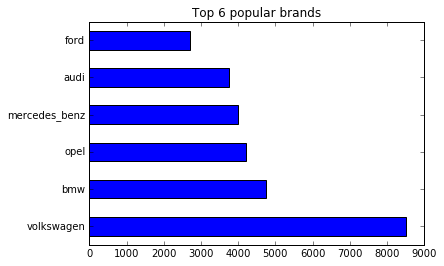

In [350]:
counts.head(6).plot.barh(title='Top 6 popular brands', legend=False)

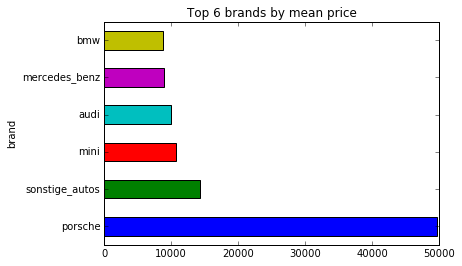

In [351]:
brand_price_df.head(6).plot.barh(x='brand',y='mean_price',title='Top 6 brands by mean price', legend=False)

- Top brands **Audi, Mercedes Benz** and **BMW**, all German, make the list of used cars with a high mean price
- **Ford** and **Opel** are top brands but much cheaper and don't make the list of top brands by price
- **Porsche**, also a German car, is the priciest used car at an average of 49661. It's understandable because it is world's #1 luxury brand clearly reflected in its price tag
- **Sonstige autos** is a distant second priciest at 14265, followed by 
- **Mini**, possibly, because it's owned by BMW
- **Renault** is the least expensive used car at 2762. 
- The average used car price is 7194.
- **Volkswagen** is the top most brand in terms of listings, however, it's not among the priciest. Its price falls below the average used car.

We may infer that there are so many **Volkswagen** listings because they can sell easily due to their lower average price. 

However, it would be interesting to see what the average mileage on it is. That tells us if it's not a well liked car and people want to dump quickly or it's so popular that despite high mileage, people expect it to be an easy sale. 

## Analysis of mileage of top 6 brands 
With mean mileage and mean price for each of the top brands, understand if there's any visible link between them

In [250]:
# Aggregate data by `odometer_km' column
# Assign brands and their mean mileages as key-value pairs to a dictionary
brand_miles = {}

for b in list(counts.head(6).index):
    # Select only rows that correspond to a specific brand
    brand_rows = autos[autos["brand"] == b]
    # Calculate the mean mileage for those rows
    mean_mileage = round(brand_rows["odometer_km"].mean(),2)
    brand_miles[b] = mean_mileage
    
print (len(brand_miles))
print (brand_miles)

6
{'bmw': 132718.17, 'opel': 128688.21, 'mercedes_benz': 130481.73, 'volkswagen': 128295.33, 'ford': 124699.59, 'audi': 128183.4}


In [251]:
# Convert `brand_miles` dictionary to a series object; don't sort values
brand_miles_series = pd.Series(brand_miles)
print (brand_miles_series)

audi             128183.40
bmw              132718.17
ford             124699.59
mercedes_benz    130481.73
opel             128688.21
volkswagen       128295.33
dtype: float64


In [252]:
# Create a dataframe from the series brand_miles_series 
brand_miles_df = pd.DataFrame(brand_miles_series,columns = ['avg_miles'])
brand_miles_df

,avg_miles
audi,128183.40
bmw,132718.17
ford,124699.59
mercedes_benz,130481.73
opel,128688.21
volkswagen,128295.33


In [253]:
# Similarly, calculate the average price for the top 6 brands, using aggregation
brand_avg_pr = {}
for b in list(counts.head(6).index):
    # Select only rows that correspond to a specific brand
    brand_rows = autos[autos["brand"] == b]
    # Calculate the mean price for those rows
    avg_pr = round(brand_rows["price"].mean(),2)
    # Assign the mean price to the dictionary brand_avg_pr, using the brand name as the key
    brand_avg_pr[b] = avg_pr
    
print (len(brand_avg_pr))
print (brand_avg_pr)

6
{'bmw': 8787.18, 'opel': 3395.65, 'mercedes_benz': 8956.98, 'volkswagen': 5941.85, 'ford': 3970.64, 'audi': 9946.88}


In [254]:
# Convert `brand_avg_pr` dictionary to a Series object
brand_avgpr_series = pd.Series(brand_avg_pr)
print (type(brand_avgpr_series))
brand_avgpr_series

<class 'pandas.core.series.Series'>


audi             9946.88
bmw              8787.18
ford             3970.64
mercedes_benz    8956.98
opel             3395.65
volkswagen       5941.85
dtype: float64

In [255]:
# Add the Series object as a new column named `mean_price` to the dataframe `brand_miles_df`
brand_miles_df['mean_price'] = brand_avgpr_series
brand_miles_df

,avg_miles,mean_price
audi,128183.40,9946.88
bmw,132718.17,8787.18
ford,124699.59,3970.64
mercedes_benz,130481.73,8956.98
opel,128688.21,3395.65
volkswagen,128295.33,5941.85


In [256]:
# Sort mileage values for seeing any connection to mean price values
brand_miles_df.sort_values('avg_miles', ascending=False)

,avg_miles,mean_price
bmw,132718.17,8787.18
mercedes_benz,130481.73,8956.98
opel,128688.21,3395.65
volkswagen,128295.33,5941.85
audi,128183.40,9946.88
ford,124699.59,3970.64


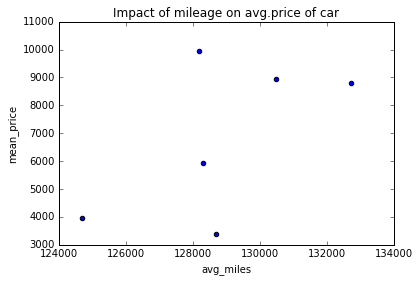

In [257]:
brand_miles_df.plot.scatter(x='avg_miles',y='mean_price',title='Impact of mileage on avg.price of car')

For the high-end brands **Audi, BMW and Mercedes**(in the top right of the scatter plot), as mileage increases, the average price clearly decreases. Mileage is a indeed factor when it comes to price, even among high-end brands.

**Ford** and **Opel** (in the bottom left) are much less expensive used cars unlike German brands. However, as mileage goes up, their price goes down consistent with the trend seen with the expensive brands.

**Volkswagen** with average mileage similar to **Opel** and higher than **Ford** still costs more than both. That could be because it's just a popular brand. It's just not in the league of expensive brands, nor comparable to the inexpensive ones. 

## Drop worthy columns


There are text columns where all or almost all values are the same or unique values are 1 or very few
- column `nr_of_pictures` as identified earlier contains all values = `0` 
- columns `seller` and `offer_type` seem to have very few unique values  
Let's see 

In [207]:
print (autos[['seller','offer_type',]].dtypes)
autos.shape

seller        object
offer_type    object
dtype: object


(40893, 20)

In [208]:
num_uniq_seller = len(autos['seller'].unique())
num_uniq_offer = len(autos['offer_type'].unique())
print (num_uniq_seller)
print (num_uniq_offer)

1
1


In [209]:
print (autos['seller'].value_counts())
print (autos['offer_type'].value_counts())

privat    40893
Name: seller, dtype: int64
Angebot    40893
Name: offer_type, dtype: int64


In [210]:
#Drop them 3 columns
autos = autos.drop(['seller','offer_type','nr_of_pictures'],axis=1)

In [211]:
autos.shape

(40893, 17)

## Further data cleaning
- ** German to English translation of Categorical data**  
These 3 columns have categorical data that needs translation from German  
`gearbox`   
`unrepaired_damage`  
`fuel_type`

In [212]:
autos['gearbox'].value_counts()

manuell      30283
automatik     9184
Name: gearbox, dtype: int64

In [213]:
autos['unrepaired_damage'].value_counts()

nein    31417
ja       3336
Name: unrepaired_damage, dtype: int64

In [214]:
autos['fuel_type'].value_counts()

benzin     24215
diesel     13685
lpg          606
cng           64
hybrid        36
elektro       18
andere         8
Name: fuel_type, dtype: int64

In [215]:
autos['gearbox'] = autos['gearbox'].str.replace('manuell','manual')
autos['gearbox'] = autos['gearbox'].str.replace('automatik','automatic')
autos['unrepaired_damage'] = autos['unrepaired_damage'].str.replace('nein','no')
autos['unrepaired_damage'] = autos['unrepaired_damage'].str.replace('ja','yes')
autos['fuel_type'] = autos['fuel_type'].str.replace('benzin', 'gasoline')
autos['fuel_type'] = autos['fuel_type'].str.replace('elektro', 'electric')
autos['fuel_type'] = autos['fuel_type'].str.replace('andere', 'other')

In [216]:
print(autos['gearbox'].value_counts())
print ('\n')
print(autos['unrepaired_damage'].value_counts())
print ('\n')
print(autos['fuel_type'].value_counts())

manual       30283
automatic     9184
Name: gearbox, dtype: int64


no     31417
yes     3336
Name: unrepaired_damage, dtype: int64


gasoline    24215
diesel      13685
lpg           606
cng            64
hybrid         36
electric       18
other           8
Name: fuel_type, dtype: int64


- **Investigation of key words from `name` column worthy of extracting as new columns**

In [217]:
autos[ ['name', 'brand','model']].tail(50)

,name,brand,model
49939,Audi_TT_Roadster_2.0_TFSI,audi,tt
49940,Omas_Liebling,bmw,3er
49941,Maserati_Ghibli_Diesel_Automatik,sonstige_autos,NaN
49942,Audi_A3_2.0_TDI_Sportback_DPF_Ambition,audi,a3
49944,SAAB_9_3__2_0t_SE__Automatik__Tempomat__Regens...,saab,andere
49945,omega_2_2_facelift_mit_neuem_tuev,opel,omega
49947,Audi_A5_2.7_TDI_+S_Line_Vollausstattung/ABT/B&...,audi,a5
49948,Hyundai_ix35_2.0_CRDi_4WD_Automatik,hyundai,i_reihe
49950,Volvo_V70_2_II__2002__AHK__Klima__Volleder,volvo,NaN
49951,Opel_Corsa_D1.0_weiss_/Scheckheftgepflegt/_Unf...,opel,corsa


- In some names, the first two words separated by `_`  indicate the `brand` and `model` of the car respectively. However, those columns already exist so, it's not worth extracting them as new columns
- Some of the names are obscure to be of value to extract into new columns (for example, `Omas_Liebling` or  `W.Lupo_1.0`)
- Some names have information reg. fuel type or gearbox which is redundant even if extracted, as those columns already exist.
- In some cases, name is a single word or random number. There's just too much text under name column and not even consistent across all rows, to extract into new columns

In [218]:
single_names =[]
for row in list(autos['name']):
    if '_' not in row:
        single_names.append(row)
pd.DataFrame(single_names)

,0
0,017668128439
1,Anfàngerauto
2,TOOPPPWAGENDIESEL
3,Schnaeppchen......
4,Schnaeppchen
5,STTOOOPPP!!!!
6,Privatanbieter
7,*RENAULT*MEGANE*1.5dCi*GRANDTOUR*EMOTION*1HAND...
8,0178/8055184
9,Schlachtfest


There are 101 names that don't convey anything meaningful or they need translation to English. Overall, there are no consistent key words in the `name` column that we can extract as is into separate columns that will provide value to analysis. In fact, it's a good candidate to drop from the dataframe.

In [219]:
autos.drop(['name'], axis=1, inplace=True)

In [220]:
autos.shape

(40893, 16)

- **Convertion of all dates to uniform numeric data**

In [221]:
autos.shape

(40893, 16)

In [222]:
autos[['date_crawled', 'ad_created', 'last_seen']].dtypes

date_crawled    object
ad_created      object
last_seen       object
dtype: object

In [223]:
autos[['date_crawled', 'ad_created', 'last_seen']].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [224]:
autos['date_crawled'] = autos['date_crawled'].str[:10]
autos['ad_created'] = autos['ad_created'].str[:10]
autos['last_seen'] = autos['last_seen'].str[:10]


In [225]:
autos['date_crawled'] = autos['date_crawled'].str.replace('-','')
autos['ad_created'] = autos['ad_created'].str.replace('-','')
autos['last_seen'] = autos['last_seen'].str.replace('-','')

In [226]:
# Convert to data type integer
autos[['date_crawled', 'ad_created', 'last_seen']] = autos[['date_crawled', 'ad_created', 'last_seen']].astype(int)

In [227]:
autos[['date_crawled', 'ad_created', 'last_seen']].dtypes

date_crawled    int64
ad_created      int64
last_seen       int64
dtype: object

In [228]:
autos[['date_crawled', 'ad_created', 'last_seen']].head()

,date_crawled,ad_created,last_seen
0,20160326,20160326,20160406
1,20160404,20160404,20160406
2,20160326,20160326,20160406
3,20160312,20160312,20160315
4,20160401,20160401,20160401


## Some more questions for further Analysis

** What are some of the most common brand/model combinations?**

In [229]:
autos[['brand','model']].head()


,brand,model
0,peugeot,andere
1,bmw,7er
2,volkswagen,golf
3,smart,fortwo
4,ford,focus


In [230]:
# Concatenate `brand`, `model` strings with a `_`
autos['brand_model'] = autos['brand']+'_'+autos['model']

In [231]:
brand_model_df = pd.DataFrame(autos['brand_model'].value_counts())

In [232]:
# The brand/model combinations that make the tope 10 most common listings 
brand_model_df.head(10)

,brand_model
volkswagen_golf,3134
bmw_3er,2373
volkswagen_polo,1291
volkswagen_passat,1276
opel_corsa,1254
opel_astra,1210
audi_a4,1199
mercedes_benz_c_klasse,1113
bmw_5er,1074
mercedes_benz_e_klasse,856


The most common cars by far are **Volkswagen** models. 

**How much cheaper are cars with damage than their non-damaged counterparts?**

In [233]:
autos.head(0)

,date_crawled,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen,brand_model


In [234]:
autos.unrepaired_damage.value_counts()

no     31417
yes     3336
Name: unrepaired_damage, dtype: int64

In [235]:
autos['unrepaired_damage'].isnull().sum()

6140

In [236]:
cars_with_damage = autos[autos['unrepaired_damage'] == 'yes']
cars_no_damage = autos[autos['unrepaired_damage'] == 'no']

print (cars_with_damage.shape)
print (cars_no_damage.shape)


(3336, 17)
(31417, 17)


In [237]:
# Calculate the average price for just this set of rows 
damage_mean = cars_with_damage['price'].mean()
no_damage_mean = cars_no_damage['price'].mean()
print (damage_mean)
print (no_damage_mean)

2803.3744004796163
7336.2024700003185


**Do average prices follow any patterns based on the mileage?**  


In [238]:
mileages = pd.DataFrame(autos['odometer_km'].unique())
print (mileages.max() - mileages.min())
mileages

0    145000
dtype: int64


,0
0,150000
1,70000
2,50000
3,10000
4,30000
5,90000
6,125000
7,20000
8,60000
9,5000


Split the odometer_km into bins like this:
(Note that left bin edge is exclusive and right bin edge is inclusive)

[1000, 31000, 61000, 91000, 121000, 151000]                                                      

In [239]:
# Create a new column `odometer_km_bins` that sets the x argument to the `odometer_km` column and sets the bins argument to the list of bin edge values
# `odometer_km` values will get assigned to the proper bin
autos['odometer_km_bins'] = pd.cut(x=autos['odometer_km'], bins=[1000, 31000, 61000, 91000, 121000, 151000])

In [240]:
# Print out some rows with the new column and checkout the bins
autos[['price', 'odometer_km', 'odometer_km_bins']].head()

,price,odometer_km,odometer_km_bins
0,5000,150000,"(121000, 151000]"
1,8500,150000,"(121000, 151000]"
2,8990,70000,"(61000, 91000]"
3,4350,70000,"(61000, 91000]"
4,1350,150000,"(121000, 151000]"


In [241]:
autos['odometer_km_bins'].value_counts()

(121000, 151000]    30377
(61000, 91000]       3888
(31000, 61000]       2729
(1000, 31000]        2051
(91000, 121000]      1848
Name: odometer_km_bins, dtype: int64

In [242]:
# Unique mileage bins to loop over, using index labels 
autos['odometer_km_bins'].value_counts().index

CategoricalIndex([(121000, 151000],   (61000, 91000],   (31000, 61000],
                     (1000, 31000],  (91000, 121000]],
                 categories=[(1000, 31000], (31000, 61000], (61000, 91000], (91000, 121000], (121000, 151000]], ordered=True, dtype='category')

In [243]:
# Produce a dictionary of average price for each mileage bin 
avg_price_by_odo_bin = {}

for b in autos['odometer_km_bins'].value_counts().index:
    # select rows that correspond to each mileage bin
    b_rows = autos[autos['odometer_km_bins'] == b]
    # Calculate the average price for just those rows
    avg_price = b_rows["price"].mean()
    # Assign the avg price value to the dictionary, using the odometer_km_bins as the key
    avg_price_by_odo_bin[b] = avg_price
    
print (avg_price_by_odo_bin)

{Interval(31000, 61000, closed='right'): 14044.41920117259, Interval(1000, 31000, closed='right'): 17594.77815699659, Interval(61000, 91000, closed='right'): 9906.484567901234, Interval(91000, 121000, closed='right'): 8237.034632034633, Interval(121000, 151000, closed='right'): 4443.746584587023}


In [244]:
# Create a dataframe from the dictionary
odo_price_df = pd.DataFrame(list(avg_price_by_odo_bin.items()),columns = ['odometer_km_groups','avg_price']) 

In [245]:
# Sort column in descending order
odo_price_df.sort_values('odometer_km_groups', ascending=False)

,odometer_km_groups,avg_price
4,"(121000, 151000]",4443.746585
3,"(91000, 121000]",8237.034632
2,"(61000, 91000]",9906.484568
0,"(31000, 61000]",14044.419201
1,"(1000, 31000]",17594.778157


In [ ]:
autos.odometer_km.plot.hist()

## Summarizing the Analyzed results from Used Car Listings

- These are the top 6 brands by listings:  

   Volkswagen  
   BMW  
   Opel  
   Mercedes-Benz  
   Audi  
   Ford  
   
   
- Some listings are priced at millions of dollars for coupes and Limousines. That aspect gives the site an impression that not every listing is realistic and buyers could be in for a surprise or a long bidding process


- Top brands **Audi, Mercedes Benz** and **BMW**, all German, on average, are also among the highest priced cars

- **Ford** and **Opel** are top brands but much cheaper and don't make the list of top brands by price

- **Porsche**, also a German car, is the priciest used car at an average of 49661. It's understandable because it is world's #1 luxury brand and has over 200 listings on this site

- **Sonstige autos** is a distant second priciest at 14265, followed by 
- **Mini**, possibly, because it's owned by BMW
- **Renault** is the least expensive used car at 2762 
- The average used car price is 7194  


- **Volkswagen** is by far the most popular brand and 3 of its models **golf, polo and passat** are the most commonly listed. However, it's not among the priciest. Its price falls below that of the average used car

 
- Almost 75% of the listings are high-mileage cars, having mileages in 121000 - 151000 KM range


- It's also worth noting that damaged cars do not dominate the listings. 8% of the listings are with (unrepaired) damages while 76% are with no (unrepaired) damages


- On an average, cars with unrepaired damages cost over 4500 less than their non-damaged counterparts. Knowing average repair costs for a brand would help a buyer decide if it's worth paying higher price for a car without damages or if the price difference
covers the damages for that brand so he or she can get it for cheaper


- Visualizing the data for `Impact of mileage on avg.price of car`(Scatter plot)corraborated what splitting mileage into separate bins showed - that the average prices increased steadily for lower mileage bins:

   For the high-end brands Audi, BMW and Mercedes, as mileage increased, the average price clearly decreased. Mileage is a indeed factor when it comes to price, even among high-end brands  

   Ford and Opel are much less expensive used cars unlike German brands. However, as mileage went up, their price went down, consistent with the trend seen with the expensive brands.

   Volkswagen with average mileage similar to Opel and higher than Ford still costs more than both. That could be because it's just a popular brand, even though it's not in the league of expensive brands or comparable to the inexpensive ones
   
   We may also infer that there are so many Volkswagen listings because they can sell easily due to their lower average price